In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [3]:
file = '/Users/straniero/Documents/Dphil/data_SPS/SPS.BQHT_MD4_20181108_222234.h5'
#file = '/Users/straniero/Documents/Dphil/data_SPS/SPS.BQHT_MD2_20181026_131253.h5'

In [4]:
def print_tree(g, indent=0):
    for key in g.keys():
        item = g[key]
        print("  " * indent + "|-- " + key)
        if isinstance(item, h5py.Group):
            print_tree(item, indent + 1)

with h5py.File(file, "r") as f:
    print_tree(f)

|-- horizontal
  |-- delta
  |-- sigma
|-- vertical
  |-- delta
  |-- sigma


In [5]:
def print_structure(name, obj):
    print(name)

with h5py.File(file, 'r') as f:
    f.visititems(print_structure)


horizontal
horizontal/delta
horizontal/sigma
vertical
vertical/delta


In [6]:
# Open the file in read mode
with h5py.File(file, 'r') as f:
    # List all groups
    print("Keys:", list(f.keys()))
    
    # Access a dataset
    vert_delta = f['vertical/delta'][:]   
    horiz_delta = f['horizontal/delta'][:]
    horiz_sigma = f['horizontal/sigma'][:]


Keys: ['horizontal', 'vertical']


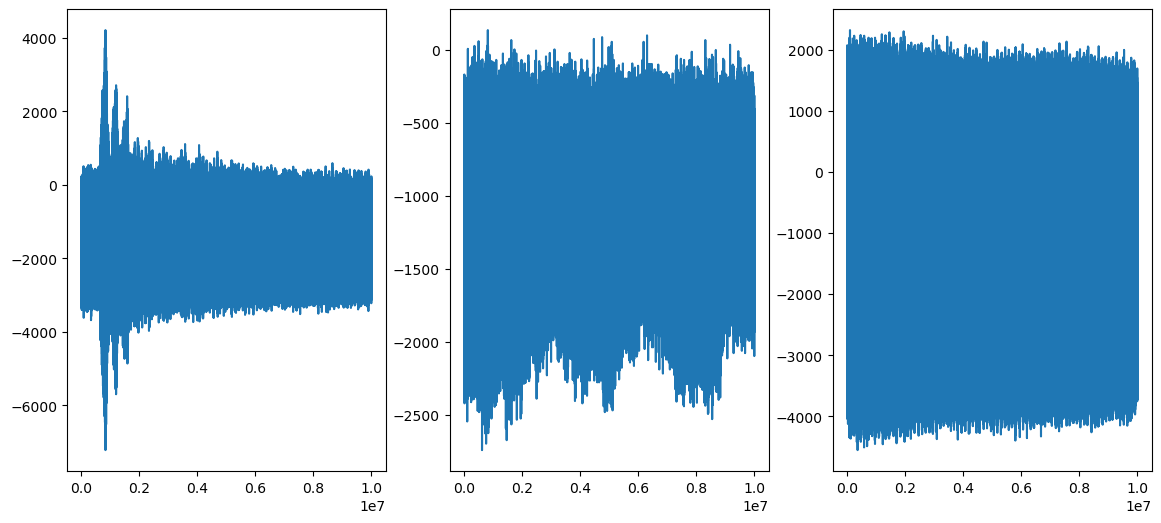

In [7]:
x = np.linspace(0, len(vert_delta), len(vert_delta))


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(14,6))

ax1.plot(x,vert_delta)
ax2.plot(x,horiz_delta)
ax3.plot(x,horiz_sigma)



In [8]:

vert_delta_split = np.empty((10000,1000))
for i in range(10000):
    vert_delta_split[i,:] = vert_delta[i*1000:(i+1)*1000]

hor_delta_split = np.empty((10000,1000))
for i in range(10000):
    hor_delta_split[i,:] = horiz_delta[i*1000:(i+1)*1000]   

hor_sigma_split = np.empty((10000,1000))
for i in range(10000):
    hor_sigma_split[i,:] = horiz_sigma[i*1000:(i+1)*1000]

## UP BUNCH


In [ ]:
up_split_bunches = np.empty((10000,1000))
for i in range(10000):
    up_split_bunches[i,:] = up_vert[i*1000:(i+1)*1000]

In [ ]:
x3= np.linspace(1,1000,1000)
plt.figure(figsize=(14,6))
plt.title("Delta + sigma")
for i in range(1000):
    plt.plot(x3,up_split_bunches[i*10,:], alpha=0.3)

## DOWN BUNCH

In [ ]:
down_split_bunches = np.empty((10000,1000))
for i in range(10000):
    down_split_bunches[i,:] = down_vert[i*1000:(i+1)*1000]

In [ ]:

plt.figure(figsize=(14,6))
plt.title("Delta-Sigma")
for i in range(1000):
    plt.plot(x3,down_split_bunches[i*10,:], alpha=0.3)

In [ ]:
n = up_split_bunches[800,:]

## FULL WIDTH HALF MAXIMUM

In [ ]:
bunch_i = 800
bunch = up_split_bunches[bunch_i,:]

#offset the bunch to have mean zero
mean_bunch = np.mean(bunch)
bunch = bunch - mean_bunch
mean_bunch2 = np.mean(bunch)  #should be zero
#find max and min
max_bunch = [np.max(bunch), np.argmax(bunch)]
min_bunch = [np.min(bunch), np.argmin(bunch)]

print(mean_bunch2)

In [ ]:
half_min = (min_bunch[0])/2 
half_max = (max_bunch[0])/2
half_min

In [ ]:
for idx, x in enumerate(bunch):
    if x <= half_min:
        c1 = idx
        break

for idx, x in enumerate(bunch):
    if x >= half_min and idx > c1:
        c2 = idx
        break

print(c2-c1)
print(c1, c2)




In [ ]:
for i in range(100):
    x = (c1-1)+i/100
    y = (bunch[c1]-bunch[c1-1])*(x-(c1-1))+bunch[c1-1]
    #print(x,y)
    if y <= half_min:
        c1_1 = x
        break

for i in range(100):
    x = (c2-1)+i/100
    y = (bunch[c2]-bunch[c2-1])*(x-(c2-1))+bunch[c2-1]
    if y >= half_min and x > c1_1:
        c2_1 = x
        break

print(c2_1-c1_1)

In [ ]:
a = 150
b = 180
#c1 = 161.2
#c2 = 168.8
x4 = np.linspace(a,b,b-a)
plt.figure(figsize=(14,10))
plt.title("Mean of Bunch 800")  
plt.plot(x4,bunch[a:b], alpha=0.5)
plt.plot(x4,mean_bunch2*np.ones(len(x4)), color='red', linestyle='--', label='Mean Value')
plt.plot(x4,half_min*np.ones(len(x4)), color='blue', linestyle='--', label='Half Min Value')
plt.vlines(c1_1, min_bunch[0], max_bunch[0], color='green', linestyle='--', label='Cut 1')
plt.vlines(c2_1, min_bunch[0], max_bunch[0], color='orange', linestyle='--', label='Cut 2')
plt.legend()

## Checking all bunches FWHM

In [ ]:
gap_FWHMs = np.empty(10000)
peak_FWHMs = np.empty(10000)
for i in range(10000):
    c1=0
    c2=0
    d1=0
    d2=0
    c1_1=0
    c2_1=0
    d1_1=0
    d2_1=0
    bunch = up_split_bunches[i,:]

    #offset the bunch to have mean zero
    mean_bunch = np.mean(bunch)
    bunch = bunch - mean_bunch

    #find max and min
    half_min = (np.min(bunch))/2 
    half_max = (np.max(bunch))/2

    #find gap FWHM
    for idx, x in enumerate(bunch):
        if x <= half_min:
            c1 = idx
            break
    for idx, x in enumerate(bunch):
        if x >= half_min and idx > c1:
            c2 = idx
            break



    #find peak FWHM
    for idx, x in enumerate(bunch):
        if x >= half_max:
            d1 = idx
            break
    
    for idx, x in enumerate(bunch):
        if x <= half_max and idx > d1:
            d2 = idx
            break
    
    #refine c1 and c2
    for i in range(100):
        x = (c1-1)+i/100
        y = (bunch[c1]-bunch[c1-1])*(x-(c1-1))+bunch[c1-1]
        #print(x,y)
        if y <= half_min:
            c1_1 = x
            break

    for i in range(100):
        x = (c2-1)+i/100
        y = (bunch[c2]-bunch[c2-1])*(x-(c2-1))+bunch[c2-1]
        if y >= half_min and x > c1_1:
            c2_1 = x
            break

    #refine d1 and d2
    for i in range(100):
        x = (d1-1)+i/100
        y = (bunch[d1]-bunch[d1-1])*(x-(d1-1))+bunch[d1-1]
        #print(x,y)
        if y >= half_max:
            d1_1 = x
            break
    
    for i in range(100):
        x = (d2-1)+i/100
        y = (bunch[d2]-bunch[d2-1])*(x-(d2-1))+bunch[d2-1]
        if y <= half_max and x > d1:
            d2_1 = x
            break
    
    if c2_1 - c1_1<30:

        gap_FWHMs[i]= c2_1 - c1_1
    else:
        gap_FWHMs[i]= 0
    peak_FWHMs[i] = d2_1 - d1_1
    #print(f'Bunch {i}: FWHM = {c2 - c1}')


In [ ]:
gap_FWHMs = np.empty(10000)
peak_FWHMs = np.empty(10000)
for i in range(10000):
    c1=0
    c2=0
    d1=0
    d2=0
    c1_1=0
    c2_1=0
    d1_1=0
    d2_1=0
    bunch = up_split_bunches[i,:]

    #offset the bunch to have mean zero
    mean_bunch = np.mean(bunch)
    bunch = bunch - mean_bunch

    #find max and min
    half_min = (np.min(bunch))/2 
    half_max = (np.max(bunch))/2

    #find gap FWHM
    for idx, x in enumerate(bunch):
        if x <= half_min:
            c1 = idx
            break
    for idx, x in enumerate(bunch):
        if x >= half_min and idx > c1:
            c2 = idx
            break



    #find peak FWHM
    for idx, x in enumerate(bunch):
        if x >= half_max:
            d1 = idx
            break
    
    for idx, x in enumerate(bunch):
        if x <= half_max and idx > d1:
            d2 = idx
            break
    
    
    if c2 - c1<30:

        gap_FWHMs[i]= c2 - c1
    else:
        gap_FWHMs[i]= 0
    peak_FWHMs[i] = d2 - d1
    #print(f'Bunch {i}: FWHM = {c2 - c1}')

In [ ]:
plt.hist([gap_FWHMs,peak_FWHMs], bins=100, label=['Gap FWHM','Peak FWHM'])
plt.legend()

## chat code

In [ ]:


def interp_cross(x0, x1, y0, y1, thr):
    """Return interpolated x where line (x0,y0)-(x1,y1) crosses thr.
       Assumes y0 != y1 and thr between y0 and y1."""
    return x0 + (thr - y0) / (y1 - y0)

def fwhm_for_row(bunch, thr, direction='above'):
    """
    Find first rising crossing and last falling crossing around the peak/gap:
    - direction='above' looks for first index where value >= thr then next where <= thr.
    - direction='below' looks for first index where value <= thr then next where >= thr.
    Returns width (float) in sample units (interpolated) or None if not found.
    """
    # ensure numpy array
    s = np.asarray(bunch)
    n = s.size

    if direction == 'above':
        # boolean crossing array: True where s >= thr
        mask = s >= thr
    else:
        mask = s <= thr

    true_idxs = np.flatnonzero(mask)
    if true_idxs.size == 0:
        return None  # never reaches threshold

    # first contiguous block that contains the first crossing
    start = true_idxs[0]

    # find end: the first index after start where mask becomes False
    # look from start to end
    after = np.flatnonzero(~mask[start+1:])  # indices relative to start+1
    if after.size == 0:
        # never falls back below/above threshold after start
        end = n - 1
        end_rel = end
    else:
        end = start + 1 + after[0]
        end_rel = end

    # interpolate left crossing: between start-1 and start (if start > 0)
    if start == 0:
        left_x = 0.0
    else:
        y0, y1 = s[start-1], s[start]
        # if y1 == y0 (flat), take start as crossing
        if y1 == y0:
            left_x = start
        else:
            left_x = interp_cross(start-1, start, y0, y1, thr)

    # interpolate right crossing: between end-1 and end (if end > 0)
    if end == 0:
        right_x = 0.0
    else:
        # If end is last index and mask[end] is still True, try to interpolate using end-1->end.
        y0, y1 = s[end-1], s[end]
        if y1 == y0:
            right_x = end
        else:
            # we want the point where it drops back across thr; note the segment chosen should bracket thr
            right_x = interp_cross(end-1, end, y0, y1, thr)

    width = right_x - left_x
    return width

def compute_fwhms(up_split_bunches):
    """
    up_split_bunches: 2D array shape (nrows, ncols)
    Returns (gap_FWHMs, peak_FWHMs) as numpy arrays of floats (NaN where not computable).
    """
    up_split_bunches = np.asarray(up_split_bunches)
    nrows = up_split_bunches.shape[0]

    gap_FWHMs = np.full(nrows, np.nan)
    peak_FWHMs = np.full(nrows, np.nan)

    for i, bunch in enumerate(up_split_bunches):
        # center the bunch to mean 0
        s = bunch - np.mean(bunch)

        # thresholds like your original code:
        half_min = np.min(s) / 2.0
        half_max = np.max(s) / 2.0

        # gap: direction 'below' (look for s <= half_min then return to >= half_min)
        gap_w = fwhm_for_row(s, half_min, direction='below')
        if gap_w is None:
            gap_FWHMs[i] = 0.0
        else:
            # keep the same rule you had: ignore spurious very wide ones (>30 samples)
            gap_FWHMs[i] = gap_w if gap_w < 100 else 0.0

        # peak: direction 'above'
        peak_w = fwhm_for_row(s, half_max, direction='above')
        if peak_w is None:
            peak_FWHMs[i] = 0.0
        else:
            peak_FWHMs[i] = peak_w

    return gap_FWHMs, peak_FWHMs


In [ ]:
gap_FWHMs, peak_FWHMs = compute_fwhms(vert_delta_split)
np.mean(gap_FWHMs), np.mean(peak_FWHMs)

In [ ]:
hist= plt.hist([gap_FWHMs,peak_FWHMs], bins=40, label=['Gap FWHM','Peak FWHM'])
plt.title('sigma-delta vertical')
plt.xlabel('FWHM sizes (samples)')
plt.ylabel('Counts')
plt.legend()

In [ ]:
print(hist)

## Normalise signal over kick

In [ ]:
step = ((3.2e9)**(-1))*1e9  # in ns
x4 = np.linspace(0, 1000*step, 1001)

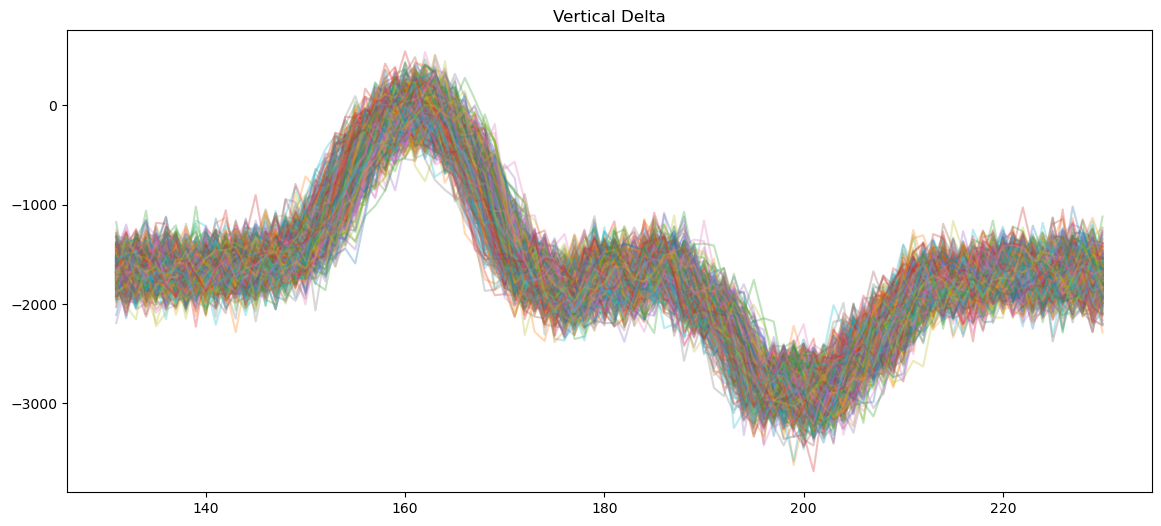

In [12]:
x3= np.linspace(1,1000,1000)
plt.figure(figsize=(14,6))
plt.title("Vertical Delta")
for i in range(500):
    plt.plot(x3[130:230], vert_delta_split[i,130:230], alpha=0.3)

In [13]:
#find maxs & mins indeces of unperturbed signal
maxs_indices = []
mins_indices = []
for i in range(500):
    bunch = vert_delta_split[i,:]
    maxs_indices.append([np.argmax(bunch),np.max(bunch)])
    mins_indices.append([np.argmin(bunch),np.max(bunch)])   

In [14]:
#Baseline fit guess
vertical_delta_b4_kick_split = vert_delta_split[0:500,:]

gaussian_FWHM = 11
sigma = gaussian_FWHM / (2 * np.sqrt(2 * np.log(2)))  # Convert FWHM to standard deviation
centre_max = int(np.mean(maxs_indices, axis=0)[0])
centre_min = int(np.mean(mins_indices, axis=0)[0])
mean = np.mean(vertical_delta_b4_kick_split)
amplitude = np.max(vertical_delta_b4_kick_split) - mean
min_amplitude = mean - np.min(vertical_delta_b4_kick_split)


In [15]:
emulated = np.ones(1000)*mean
emulated[centre_max-3*int(sigma):centre_max+3*int(sigma)] += 0.9*amplitude * np.exp(-0.5 * ((np.arange(centre_max-3*int(sigma), centre_max+3*int(sigma)) - centre_max) / sigma) ** 2)
emulated[centre_min-3*int(sigma):centre_min+3*int(sigma)] -= 0.85*min_amplitude * np.exp(-0.5 * ((np.arange(centre_min-3*int(sigma), centre_min+3*int(sigma)) - centre_min) / sigma) ** 2)


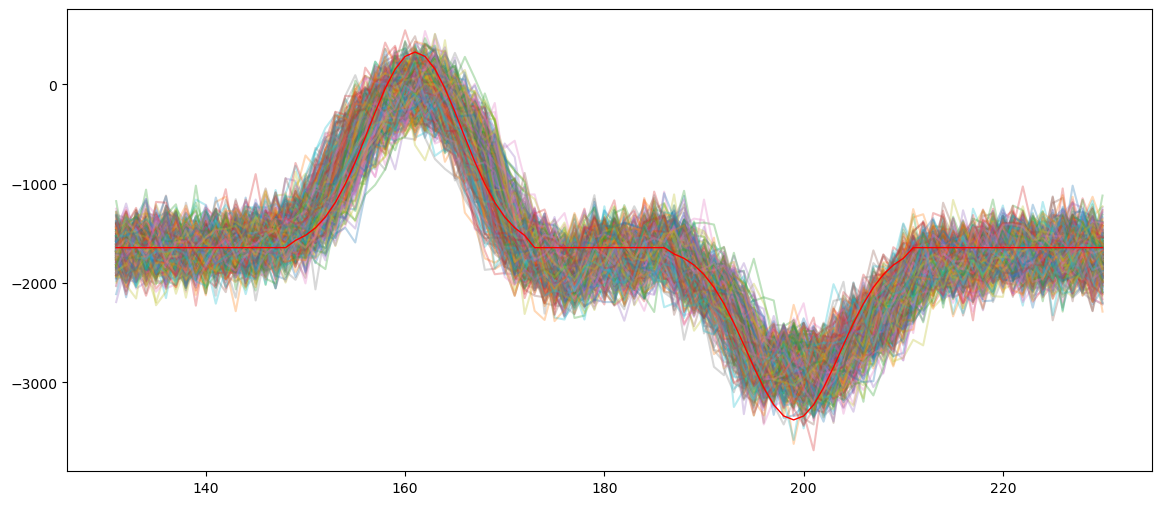

In [16]:
plt.figure(figsize=(14,6))
for i in range(500):
    plt.plot(x3[130:230], vert_delta_split[i,130:230], alpha=0.3)
plt.plot(x3[130:230], emulated[130:230], color='red', linewidth=1)
plt.show()

In [17]:
##Offset
offset_vert_delta_split = np.empty((10000,1000))
for i in range(10000):
    offset_vert_delta_split[i,:] = vert_delta_split[i,:] - emulated

In [18]:
envelope = np.ones(1000)
envelope_max=[164,5000]
envelope[envelope_max[0]-4*int(sigma):envelope_max[0]+4*int(sigma)] += 0.9*envelope_max[1] * np.exp(-0.5 * ((np.arange(envelope_max[0]-4*int(sigma), envelope_max[0]+4*int(sigma)) - envelope_max[0]) / sigma) ** 2)

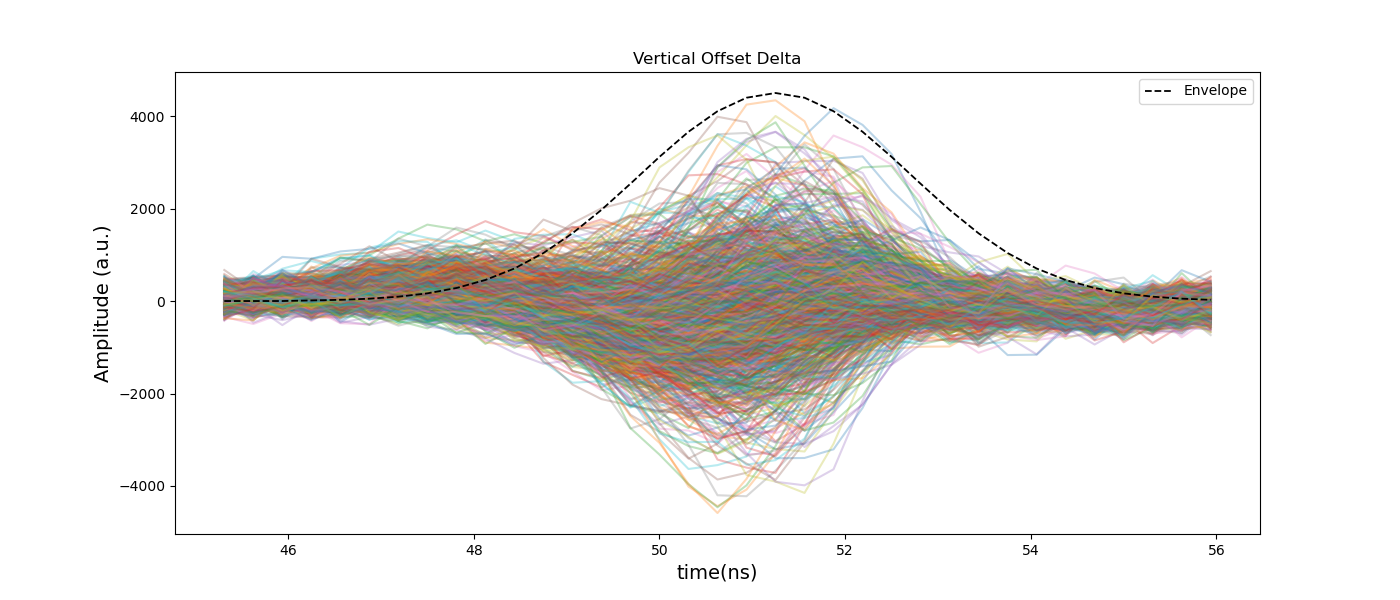

In [33]:
x3= np.linspace(1,1000,1000)
plt.figure(figsize=(14,6))
plt.title("Vertical Offset Delta")
plt.xlabel('time(ns)',fontsize=14)
plt.ylabel('Amplitude (a.u.)',fontsize=14)

for i in range(500,2000):
    plt.plot(x4[145:180],offset_vert_delta_split[i,145:180], alpha=0.3)
plt.plot(x4[145:180],envelope[145:180],'--', color='black', linewidth=1.3, label='Envelope')
plt.legend()

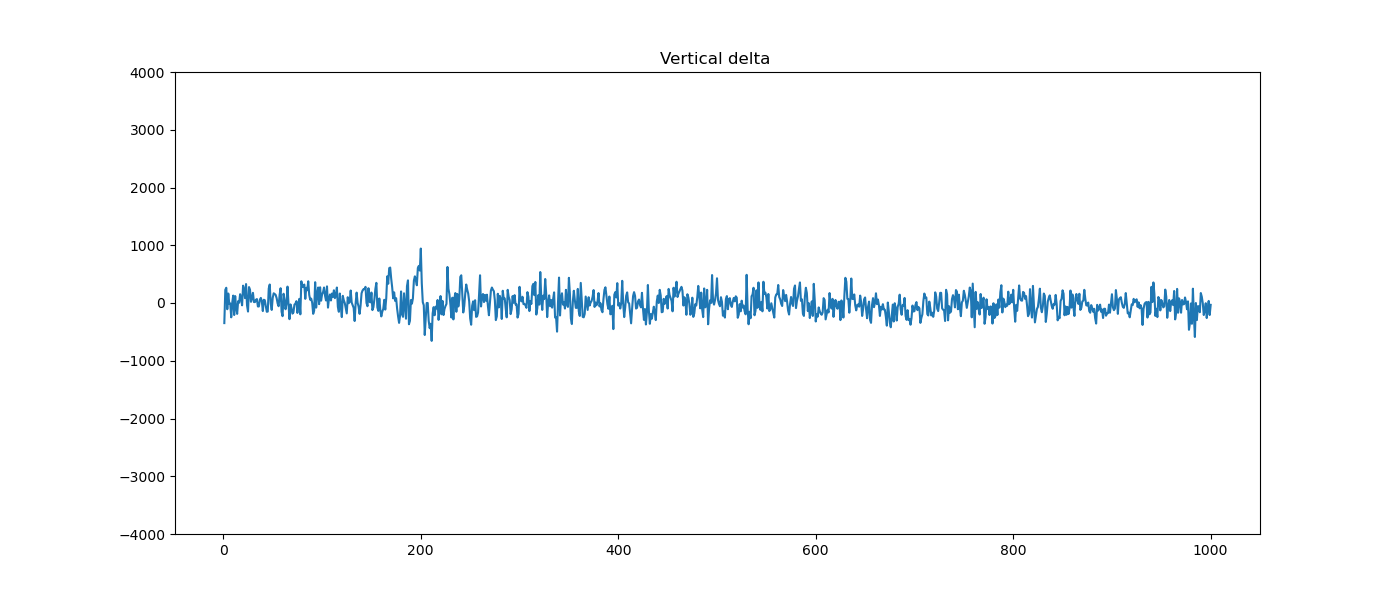

In [20]:
import matplotlib.animation as animation
%matplotlib ipympl

fig2, ax = plt.subplots(figsize=(14, 6))
graph, = ax.plot(x3, offset_vert_delta_split[0, :])
ax.set_title("Vertical delta ")
# Add a text box to display the frame number
frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.7))
#Set axes limits
ax.set_ylim(-4000, 4000)
def update(frame):
    graph.set_ydata(offset_vert_delta_split[frame, :])
    frame_text.set_text(f'Loop: {frame}')
    return graph, frame_text

ani = animation.FuncAnimation(fig2, update, frames=range(620,1100), blit=False, interval=50, repeat=False)

#ani.save('vertical_sigma_evolution.mp4', writer='ffmpeg', fps=20)

In [21]:
tops = np.zeros((1,2))
offset_vert_delta = np.empty(int(1e7))
for i in range(10000):
    offset_vert_delta[i*1000:(i+1)*1000]= offset_vert_delta_split[i,:]


for id,p in enumerate(offset_vert_delta[int(6e5):int(7e6)]):
    if p> 1300:
        adding = np.ones((1,2))
        adding[0,0]=id+int(6e5)
        adding[0,1]=p
        tops = np.append(tops, adding, axis=0)



In [22]:
len(tops)

2030

In [23]:
#write the previous cell as a function

def refine_peaks(tops, threshold=500):
    tops = np.asarray(tops)
    tops_refined = []

    i = 0
    while i < len(tops):
        # start with current peak
        current_peak = tops[i]

        # check if next peak is within threshold samples
        if i < len(tops) - 1 and (tops[i+1,0] - tops[i,0] < threshold):
            # pick the higher one
            if tops[i,1] >= tops[i+1,1]:
                adding = current_peak
            else:
                adding = tops[i+1]
            i += 2        # skip the next one since it's handled
        else:
            # keep current peak as is
            adding = current_peak
            i += 1

        tops_refined.append(adding)

    tops_refined = np.vstack(tops_refined)
    return tops_refined

In [24]:
tops_copy = tops.copy()
for i in range(35):
    tops_refined = refine_peaks(tops_copy, threshold=500)
    if len(tops_refined) == len(tops_copy):
        break
    else:
        tops_copy = tops_refined


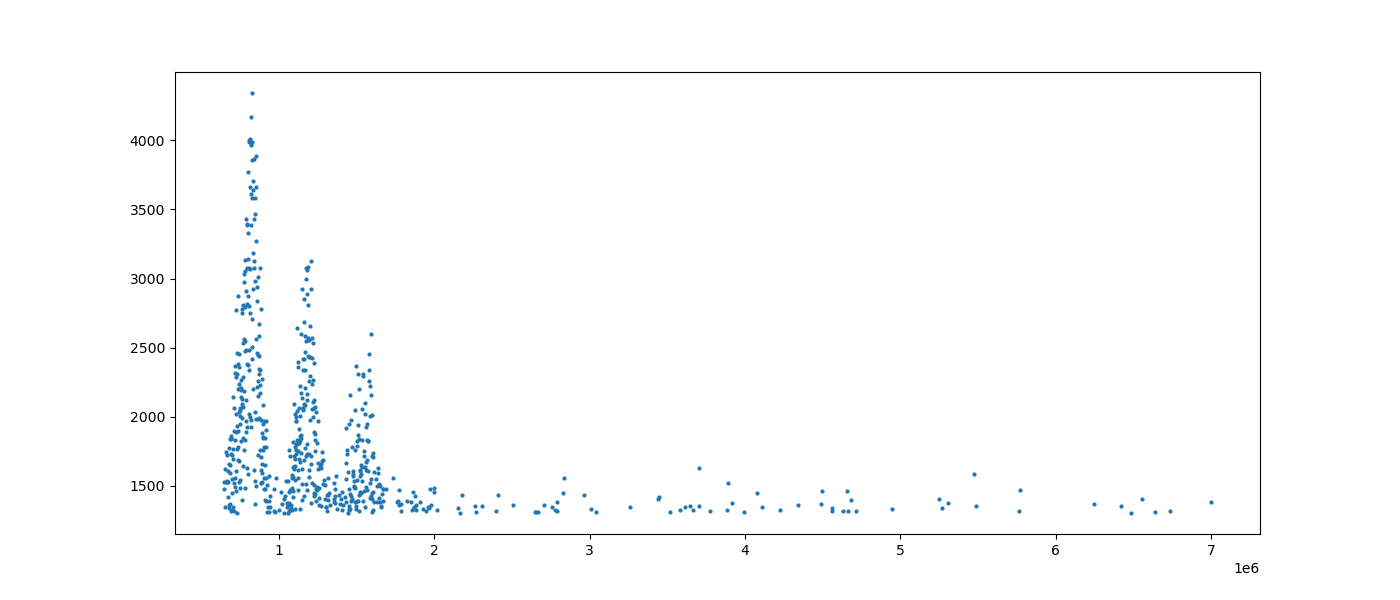

In [25]:
plt.figure(figsize=(14,6))
plt.plot(tops_refined[1:,0], tops_refined[1:,1], marker='o', linestyle='None',markersize=2)

In [26]:
#calculate difference between peaks positions
peak_differences = []
for i in range(1, len(tops_refined)):
    diff = tops_refined[i,0] - tops_refined[i-1,0]
    peak_differences.append(diff)
    

## FADING GRAPHS ANIMATION

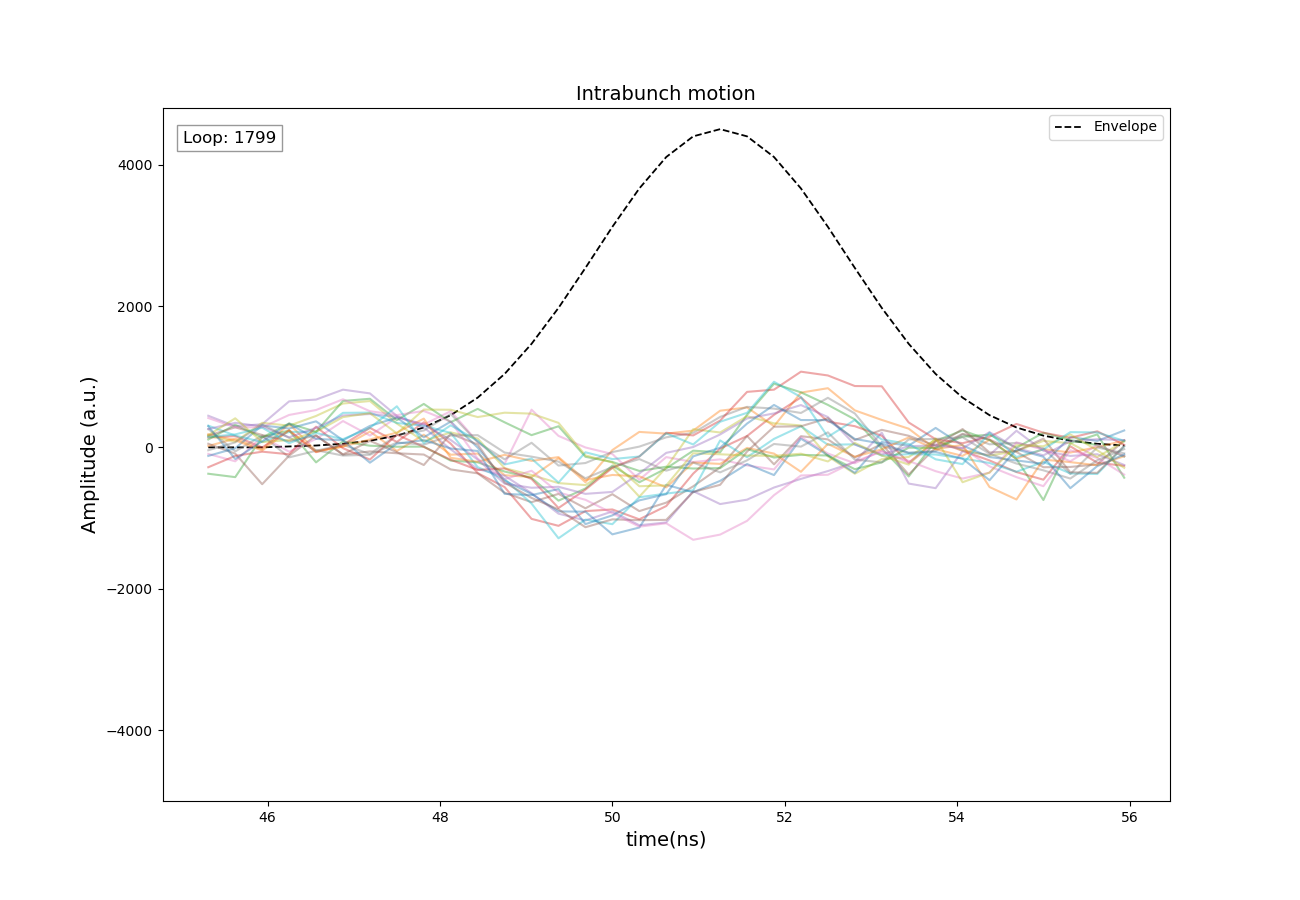

In [32]:
import matplotlib.animation as animation
step = ((3.2e9)**(-1))*1e9  # in ns
x4 = np.linspace(0, 1000*step, 1001)
%matplotlib ipympl

fig, ax = plt.subplots(figsize=(13,9))

#ax.set_xlim(144, 181)
ax.set_ylim(np.nanmin(-5000), np.nanmax(4800))
ax.set_title("Intrabunch motion", fontsize=14)
ax.set_xlabel('time(ns)',fontsize=14)
ax.set_ylabel('Amplitude (a.u.)',fontsize=14)
ax.plot(x4[145:180],envelope[145:180],'--', color='black', linewidth=1.3, label='Envelope')
ax.legend()
lines = []            # store plotted Line2D objects
KEEP = 20

frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.4))

def update(frame):
    # plot the new frame as a new line
    line, = ax.plot(x4[145:180], offset_vert_delta_split[frame,145:180], alpha=0.4)
    lines.append(line)

    # if we have more than KEEP, remove the oldest from axes and list
    if len(lines) > KEEP:
        old = lines.pop(0)
        old.remove()   # remove from axes so it no longer draws

    # update text
    frame_text.set_text(f'Loop: {frame}')
    return []   # blit=False ignores returned artists
               # (we still return nothing; matplotlib redraws whole canvas)
               
ani = animation.FuncAnimation(fig, update, frames=range(550,1800), blit=False, interval=50,repeat=False)
ani.save('vertical_sigma_vanishing.mp4', writer='ffmpeg', fps=20)